# 北尾早霧・砂川武貴・山田知明『定量的マクロ経済学と数値計算』日本評論社
## 第2章：2期間モデル・3期間モデルと数値計算の概観

## 2.8.1 3期間モデル

# Interpolation.jlの使い方
https://juliamath.github.io/Interpolations.jl/stable/

* Juliaにおける線形補間用パッケージ
* 下記では線形補間でしか使っていないが、実際はB-Splineに対応しているので、Cubic Splineとかも使える
* コードの書き方がやや面倒なので、テキストでは同じく近似用パッケージである**Dierckx**をメインに使っています
    * Dierckxについては⬇

## 適当な二次関数を考える
$$
    y = a (x -b)^2 + c
$$

In [1]:
function test_function(x, a, b, c)
    return a*(x - b)^2 + c
end

test_function (generic function with 1 method)

In [2]:
x = -10:0.01:10

-10.0:0.01:10.0

In [3]:
# パラメータを設定
a = 0.75
b = 2.0
c = -10.0;

In [4]:
y = zeros(length(x));

In [5]:
# 与えたパラメータ(a,b,c)の下で、x \in [-10,10]の範囲のyを計算
for i = 1:length(x)
    y[i] = test_function(x[i], a, b, c)
end

In [6]:
using Plots
#pyplot()

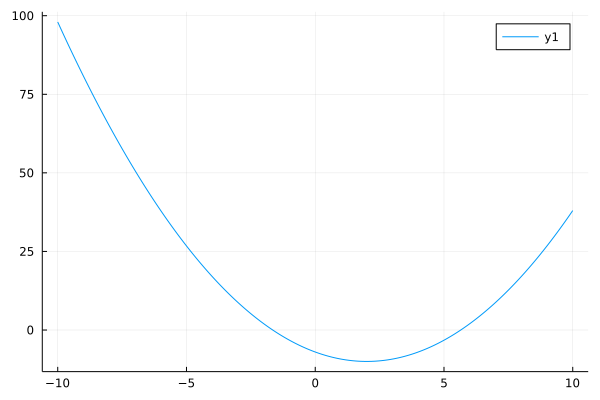

In [7]:
# 実際の2次関数はこんな感じ
plot(x, y)

---

## 5個の点しかデータが得られなかったとしたら...

In [8]:
x1 = [-10.0, -5.0, 0.0, 5.0, 10.0];

In [9]:
y1 = zeros(length(x1))
for i = 1:length(x1)
    y1[i] = test_function(x1[i], a, b, c)
end

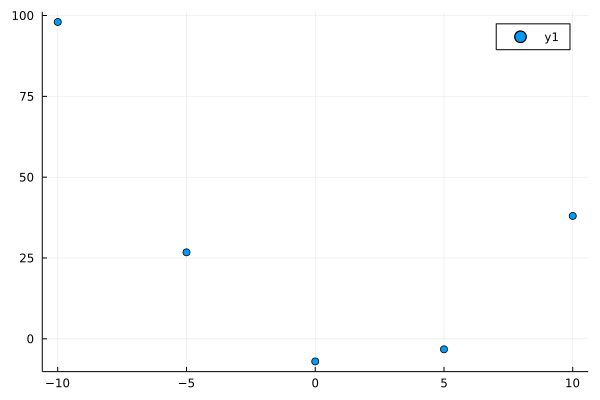

In [10]:
# 我々が知っているのは⬇の5個の点のみ
# ここから隙間を埋めることを考える
scatter(x1, y1)

---

## 線形補間

In [11]:
using Interpolations

* 線形補間の係数(各点の間の傾き)を計算する
* 公式HPが**interp_linear**にしているのでそのまま使用
* ちょっと長いかも：liとかでもOK

In [38]:
#interp_linear = linear_interpolation(x1, y1)
interp_linear = LinearInterpolation(x1, y1)
# li = linear_interpolation(x1, y1)

5-element extrapolate(scale(interpolate(::Vector{Float64}, BSpline(Linear())), (-10:5:10,)), Throw()) with element type Float64:
 98.0
 26.75
 -7.0
 -3.25
 38.0

In [39]:
# 型が特殊なので確認しておく
typeof(interp_linear)

Interpolations.Extrapolation{Float64, 1, ScaledInterpolation{Float64, 1, Interpolations.BSplineInterpolation{Float64, 1, Vector{Float64}, BSpline{Linear{Throw{OnGrid}}}, Tuple{Base.OneTo{Int64}}}, BSpline{Linear{Throw{OnGrid}}}, Tuple{StepRange{Int64, Int64}}}, BSpline{Linear{Throw{OnGrid}}}, Throw{Nothing}}

* 使い方は簡単
    * y = interp_linear(x)のように使う
    * xが知りたい点で、yはx上の近似した値

In [40]:
# 使い方：既知の点(x= -5)でのyの値
interp_linear(-5)

26.75

In [41]:
test_function(-5, a, b, c) # データにある値なので上の値と一致する

26.75

In [42]:
# データ上に無い点を線形近似
interp_linear(-5.5)

33.87500000000001

In [43]:
# 線形近似とはズレが生じる
test_function(-5.5, a, b, c)

32.1875

### 外挿(extrapolation)
* [-10,10]の範囲で内挿のための係数(線形補間の傾き)を計算しているので、範囲の外はよくわからない
* 範囲の外を計算することを**外挿（extrapolation）**と呼ぶ
* 外挿法にもいくつか方法がある
    * 何も指定しないとエラーになる
    * 外挿のためのオプションを指定する

In [45]:
# オプションを指定しないと外挿は出来ない：エラーが出ます
interp_linear(-15)

LoadError: BoundsError: attempt to access 5-element extrapolate(scale(interpolate(::Vector{Float64}, BSpline(Linear())), (-10:5:10,)), Throw()) with element type Float64 at index [-15]

In [46]:
# 外挿法：[-10,10]の外は線形で延長する場合
#interp_linear_extrap = linear_interpolation(x1, y1, extrapolation_bc=Line()) 
interp_linear_extrap = LinearInterpolation(x1, y1, extrapolation_bc=Line()) 
interp_linear_extrap(-15)

169.25

#### 注意
* 外挿法は一般的に誤差が大きくなるので、定義域から大幅に離れた近似は信用できない

In [47]:
# 実際の値とは大きなズレが生じている：169.25 / 206.75
test_function(-15, a, b, c)

206.75

### 上の5個の点を線形補間した図
* グリッドポイント上でキンクが生じている
    * 微分不可能
* 外挿も線形補間を選択しているので、-10以下と10以上の値は傾きを延伸した形状になっている。

In [48]:
x2 = -15:0.01:15
y2 = zeros(length(x2))

for i = 1:length(x2)
    y2[i] = interp_linear_extrap(x2[i])
end

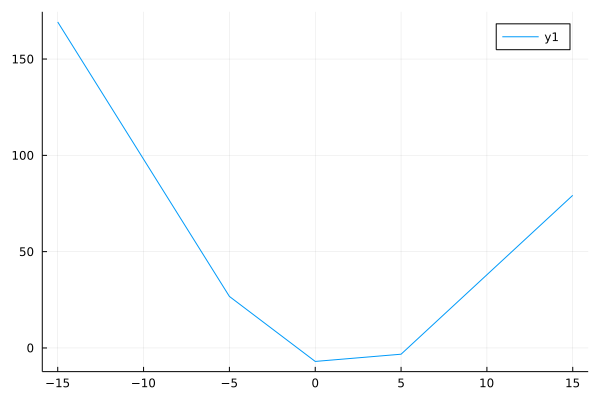

In [49]:
plot(x2, y2)

---

## 3.3.2 3次のスプライン近似
* linear_interpolationではなく、cubic_spline_interpolationを使う

In [50]:
# 型がrangeでないと駄目みたいなので、x1を作り直し(値自体は同じ)
# やや使いにくい
x1 = -10:5:10
interp_cubic = CubicSplineInterpolation(x1, y1)
#interp_cubic = cubic_spline_interpolation(x1, y1)

5-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:6), BSpline(Cubic(Line(OnGrid())))), (-10:5:10,)), Throw()) with element type Float64:
 98.0
 26.75
 -7.0
 -3.2500000000000027
 38.0

In [51]:
# やはり型が特殊
typeof(interp_cubic)

Interpolations.Extrapolation{Float64, 1, ScaledInterpolation{Float64, 1, Interpolations.BSplineInterpolation{Float64, 1, OffsetArrays.OffsetVector{Float64, Vector{Float64}}, BSpline{Cubic{Line{OnGrid}}}, Tuple{Base.OneTo{Int64}}}, BSpline{Cubic{Line{OnGrid}}}, Tuple{StepRange{Int64, Int64}}}, BSpline{Cubic{Line{OnGrid}}}, Throw{Nothing}}

In [52]:
x3 = -10:0.01:10
y3 = zeros(length(x3))
for i = 1:length(x3)
    y3[i] = interp_cubic(x3[i])
end

### 同じ5点を線形補間ではなくCubic Spline Interpolationで近似した場合
* より"自然"に見える

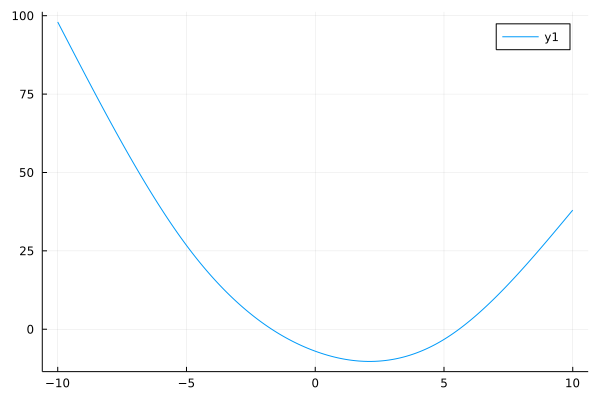

In [53]:
plot(x3, y3)

---

# Dierckx.jlを使う
https://github.com/kbarbary/Dierckx.jl
* 内挿法用のライブラリその(2)
* もともとはFortranライブラリだったものをJuliaに翻訳したらしい
* Interpolations.jlのCubic Spline Interpolationが定義域の型のせいでやや使いにくいので、テキストでは基本的にこちらを使用しています

In [54]:
using Dierckx

* cubic_spline_interpolationの代わりに、Dierckx.jlではSpline1Dを使う
    * Spline1D(knots=[-10.0, 0.0, 10.0], k=3, extrapolation="nearest", residual=0.0)というメッセージの"k=3"の部分が3次の(cubic)スプラインであることを意味している

In [55]:
spl = Spline1D(x1, y1)

Spline1D(knots=[-10.0, 0.0, 10.0], k=3, extrapolation="nearest", residual=0.0)

* 試しに、[-15,15]の範囲を近似してみる

In [56]:
x4 = -15:0.01:15
y4 = zeros(length(x4))
for i = 1:length(x4)
    y4[i] = spl(x4[i])
end

* 外挿法：Dierckx.jlの場合、デフォルトでは端点を延伸する
    * 外挿(定義域の外)をどう扱うかはパッケージや言語(Matlab、Pythonなどの内挿法)に依存しているので、こうなるとは限らない
* うっかり指定し忘れるとおかしな計算結果を返す可能性がある

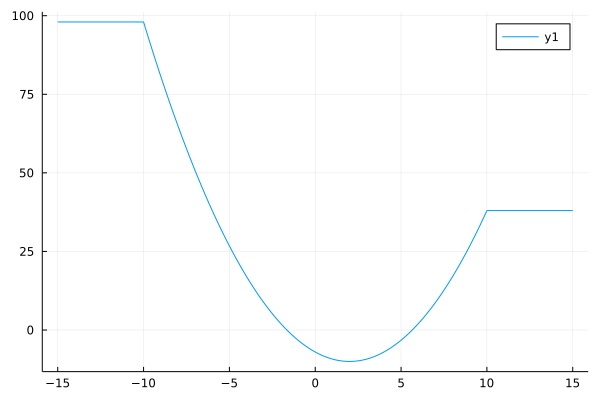

In [57]:
plot(x4, y4)

In [58]:
# 外挿することを明記
spl2 = Spline1D(x1, y1, bc="extrapolate")

Spline1D(knots=[-10.0, 0.0, 10.0], k=3, extrapolation="extrapolate", residual=0.0)

In [59]:
x5 = -15:0.01:15
y5 = zeros(length(x5))
for i = 1:length(x5)
    y5[i] = spl2(x5[i])
end

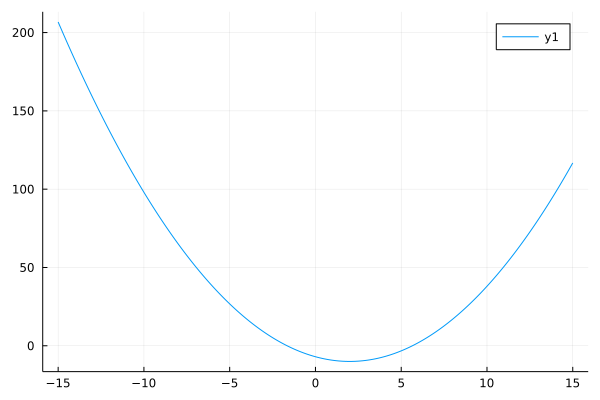

In [60]:
# より自然になった
plot(x5, y5)

## Dierckx.jlで線形補間+Extrapolation
* Dierckx.jlでも線形補間は可能
    * そのため線形補間はInterpolations.jlでスプラインはDierckx.jlを使う、みたいな使い分けは不要
* k=1というオプションを明示的に書くと線形補間に対応

In [61]:
spl = Spline1D(x1, y1, k=1, bc="extrapolate")

Spline1D(knots=[-10.0, -5.0, 0.0, 5.0, 10.0], k=1, extrapolation="extrapolate", residual=0.0)

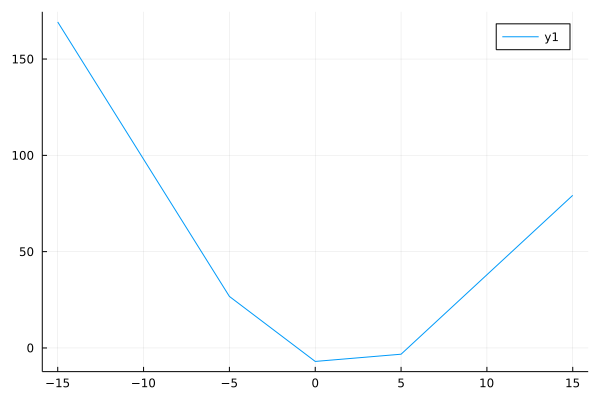

In [62]:
# 線形補間の図を再現
x = -15:0.01:15
y = zeros(length(x))
for i = 1:length(x)
    y[i] = spl(x[i])
end
plot(x, y)

#### Extrapolationのオプション
* nearestだと両端をそのまま延長
* zeroだと強制的にゼロに設定
    * どちらも実際にはあまり使わなそう...
* errorというオプションもある
    * 絶対に外に出てほしくない場合に使う

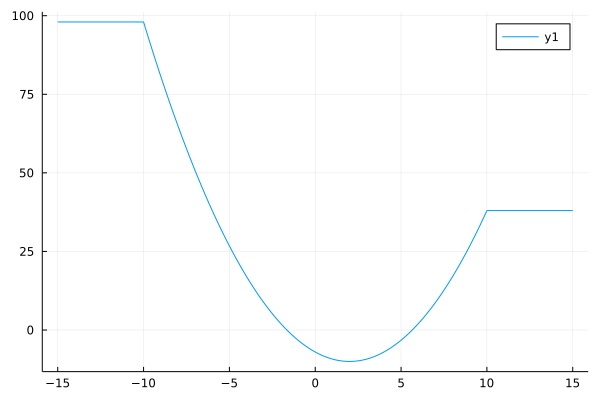

In [63]:
spl = Spline1D(x1, y1, bc="nearest")
x = -15:0.01:15
y = zeros(length(x))
for i = 1:length(x)
    y[i] = spl(x[i])
end
plot(x, y)

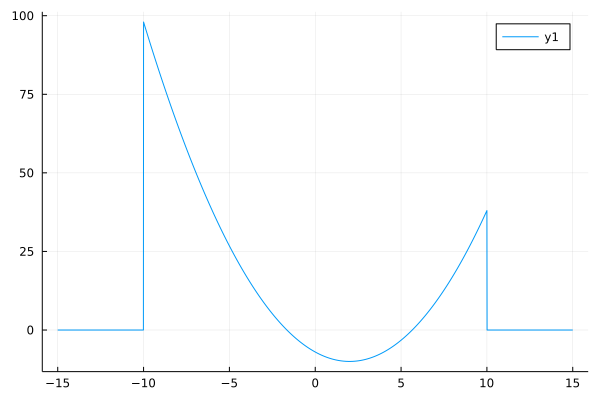

In [64]:
spl = Spline1D(x1, y1, bc="zero")
x = -15:0.01:15
y = zeros(length(x))
for i = 1:length(x)
    y[i] = spl(x[i])
end
plot(x, y)

## 追記
* 2次元のスプラインもある
* 偏微係数などを計算するオプションもある
    * Value Functionの傾きなどで使いみちはありそう
    * どの程度の精度かは未使用なので不明